In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from matplotlib import pyplot as plt

data = pd.read_csv  (r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_rb_training.csv')
rookie_data = pd.read_csv (r'C:\Users\Logan Clark\Documents\Fantasy Stuff\Football Data\pahowdy_cfb_rb_rookies.csv')

print(data)


                    Name                 cfb_id    pfr_id              School  \
0       Woodrow Dantzler     woodrow-dantzler-1  DantWo00             Clemson   
1             Greg Jones           greg-jones-1  JoneGr01       Florida State   
2           Travis Minor         travis-minor-1  MinoTr00       Florida State   
3              Joe Burns            joe-burns-1  BurnJo00        Georgia Tech   
4            Bruce Perry          bruce-perry-1  PerrBr01            Maryland   
..                   ...                    ...       ...                 ...   
497       Keylon Kincade       keylon-kincade-1  KincKe00  Southern Methodist   
498         George Layne         george-layne-1  LaynGe00     Texas Christian   
499  LaDainian Tomlinson  ladainian-tomlinson-1  TomlLa00     Texas Christian   
500     Kerwynn Williams     kerwynn-williams-1  WillKe05          Utah State   
501        Robert Turbin        robert-turbin-1  TurbRo00          Utah State   

    Conference    DR    DP 

In [13]:
y = data.iloc[:, 107].to_numpy()
print(len(y))

for i in range(len(y)):
    if y[i] > 20:
        for x in range(10):
            data = data.append(data.iloc[i])
            #npData = np.vstack([npData, npData[i]])
            y = np.append(y, y[i])


print(len(y))

502
792


(array([259., 136.,  53.,  23., 134.,  55.,  88.,  33.,   0.,  11.]),
 array([ 0.114 ,  4.8832,  9.6524, 14.4216, 19.1908, 23.96  , 28.7292,
        33.4984, 38.2676, 43.0368, 47.806 ]),
 <BarContainer object of 10 artists>)

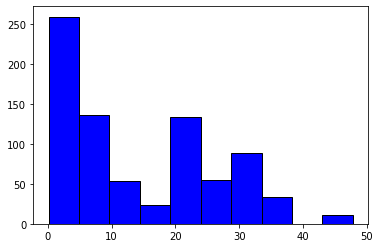

In [14]:
plt.hist(y, color = 'blue', edgecolor = 'black',
         bins = 10)

In [15]:
cols = list(data.columns)
cols_rookie = list(rookie_data.columns)

remove = list()
remove_rookie = list()

names1 = list(rookie_data.iloc[:, 0])

for i in range(len(cols)):
    if (i > 86 or i<9):
        remove.append(cols[i])
    
for i in range(len(cols_rookie)):
    if (i<9):
        remove_rookie.append(cols_rookie[i])

# print(remove)
# print(remove_rookie)
    
x = data.drop(columns=remove)

x_rookie = rookie_data.drop(columns=remove_rookie)

x = x.drop(columns=['Last.7', 'Best.7'])

x_rookie = x_rookie.drop(columns=['Last.7', 'Best.7'])


labels = list(x.columns)

labels_rookie = list(x_rookie.columns)

# print(len(labels))
# print(len(labels_rookie))

# print(x_rookie)

In [18]:
names = ["linReg", "ridgeReg", "lassoReg", "dtReg", "rfReg", "svrReg"]

namesDict = dict()

for i in names:
    namesDict[i] = 0
    
#print(namesDict)

for i in range(100):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    linReg = LinearRegression().fit(X_train, y_train)
    namesDict["linReg"] = namesDict["linReg"] + linReg.score(X_test, y_test)

    ridgeReg = Ridge().fit(X_train, y_train)
    namesDict["ridgeReg"] = namesDict["ridgeReg"] + ridgeReg.score(X_test, y_test)

    lassoReg = Lasso().fit(X_train, y_train)
    namesDict["lassoReg"] = namesDict["lassoReg"] + lassoReg.score(X_test, y_test)

    dtReg = DecisionTreeRegressor().fit(X_train, y_train)
    namesDict["dtReg"] = namesDict["dtReg"] + dtReg.score(X_test, y_test)

    rfReg = RandomForestRegressor().fit(X_train, y_train)
    namesDict["rfReg"] = namesDict["rfReg"] + rfReg.score(X_test, y_test)

    svrReg = SVR().fit(X_train, y_train)
    namesDict["svrReg"] = namesDict["svrReg"] + svrReg.score(X_test, y_test)

for i in namesDict:
    print(i + ": " + str(namesDict[i]/100))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
linReg: 0.6334133914421597
ridgeReg: 0.6529296217189885
lassoReg: 0.5397924146443237
dtReg: 0.8172844081880861
rfReg: 0.9035145538961471
svrReg: 0.14097784331934943


Age IN DRAFT YEAR
Feature: 0, Score: -1.37508
Conference Drafted Rate
Feature: 1, Score: -8.43765
Conference Hit Rate
Feature: 2, Score: 1.51289
Age Draft Hit Rate AVG
Feature: 3, Score: 16.42190
PRE-DRAFT MODEL
Feature: 4, Score: 3.98444
PRE-DRAFT Percentile
Feature: 5, Score: -1.95896
Post Draft Model
Feature: 6, Score: 2.26261
Post Draft Percentile
Feature: 7, Score: -6.88402
Years Played
Feature: 8, Score: -0.02762
rec
Feature: 9, Score: 0.03773
Touches
Feature: 10, Score: 0.00040
All Yards
Feature: 11, Score: -0.00126
YD/G
Feature: 12, Score: 0.00849
AVG YD/G
Feature: 13, Score: 0.04300
YPTch
Feature: 14, Score: 0.17477
G
Feature: 15, Score: 0.04567
Years >= 20 Recs
Feature: 16, Score: -0.70000
REC/g
Feature: 17, Score: 1.06025
(total) College Dominator Rating
Feature: 18, Score: -1.64303
YPTpA Dominator
Feature: 19, Score: -0.75706
Team (Best)
Feature: 20, Score: -2.36901
Conference (Best)
Feature: 21, Score: -3.59906
Hits (Best)
Feature: 22, Score: -3.28627
First
Feature: 23, Sc

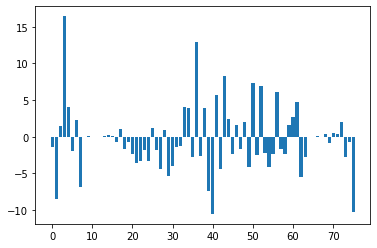

In [19]:
importance = ridgeReg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print(labels[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
rfReg.predict(x_rookie)

array([18.37536, 19.59562,  6.7669 ,  7.42676, 16.22068, 12.61344,
        6.55844,  6.41338,  3.59856,  3.1461 ,  5.20182,  5.61112,
        4.36416,  3.95234,  5.4921 ,  3.5376 ,  4.0492 ,  9.48482,
        9.14048,  3.27566,  3.96804,  2.42754,  5.22748,  5.83244,
        3.6116 ,  4.04918,  6.32602,  3.09678,  7.55478,  4.75098,
        5.0828 ,  5.3914 , 10.35536,  3.40604,  3.82998,  4.16528,
        4.61016,  2.88778,  4.40078,  5.57876,  6.5296 ,  1.65138,
        3.58898,  3.38054,  3.70546,  2.9021 ,  4.86048,  3.13246,
        3.47174,  3.88672,  3.31628])

In [21]:
# print(np.shape(x))
# print(np.shape(x_rookie))

predictions = list(rfReg.predict(x_rookie))

tempDict = dict()

for i in range(len(predictions)):
     tempDict[names1[i]] = predictions[i]   
        
new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)

# for i in x_rookie:
#     print(x_rookie[i])

('Najee Harris', 19.595620000000007)
('Travis Etienne', 18.375359999999997)
('Javonte Williams', 16.22068)
('Trey Sermon', 12.613439999999999)
('Elijah Collins', 10.355360000000008)
('CJ Verdell', 9.484820000000003)
('Chuba Hubbard', 9.140479999999995)
('Isaiah Bowser', 7.554780000000002)
('Pooka Williams', 7.426759999999999)
('Kenny Gainwell', 6.7669)
('Jermar Jefferson', 6.558440000000002)
('Michael Carter', 6.529599999999999)
('Stevie Scott', 6.413380000000001)
('Kennedy Brooks', 6.326020000000001)
('JaTarvious Whitlow', 5.832439999999999)
('Elijah Mitchell', 5.611119999999999)
('Malik Davis', 5.578760000000002)
('Journey Brown', 5.492100000000001)
('Rakeem Boyd', 5.391399999999999)
('Josh Johnson', 5.227479999999996)
('Spencer Brown', 5.2018200000000006)
('Jaret Patterson', 5.082799999999997)
('Rhamondre Stevenson', 4.860480000000003)
('Gerrid Doaks', 4.750979999999998)
('Keaontay Ingram', 4.610159999999999)
('Jafar Armstrong', 4.400780000000001)
('Kylin Hill', 4.364160000000002)
(

In [22]:
tempDict = dict()

for i in names1:
    tempDict[i] = 0


for i in range(100):
    realRfReg = RandomForestRegressor().fit(x, y)

    predictions = list(realRfReg.predict(x_rookie))

    for i in range(len(predictions)):
         tempDict[names1[i]] = tempDict[names1[i]] + predictions[i]   

new = sorted(tempDict.items(), key=lambda x: x[1], reverse=True)

for i in new:
    print(i)


('Travis Etienne', 2008.0538400000019)
('Najee Harris', 1668.4584000000011)
('Javonte Williams', 1593.8229200000005)
('Trey Sermon', 1157.2983199999999)
('CJ Verdell', 855.9949799999999)
('Pooka Williams', 855.1048200000005)
('Elijah Collins', 842.3521600000008)
('Chuba Hubbard', 837.9639599999999)
('Jermar Jefferson', 756.3068799999996)
('Michael Carter', 676.9904400000003)
('Stevie Scott', 674.8762599999998)
('Kenny Gainwell', 629.4142200000002)
('Journey Brown', 624.8338199999997)
('Isaiah Bowser', 614.8184800000001)
('Josh Johnson', 590.2216999999998)
('Spencer Brown', 565.07098)
('Kennedy Brooks', 558.64796)
('JaTarvious Whitlow', 535.9080000000001)
('Rhamondre Stevenson', 535.4148200000002)
('Rakeem Boyd', 522.8101199999999)
('Malik Davis', 512.42378)
('Elijah Mitchell', 493.7127599999999)
('Javian Hawkins', 483.0402799999996)
('Jaret Patterson', 477.25782000000015)
('Jafar Armstrong', 475.0609400000001)
('B.J. Emmons', 464.3004999999998)
('Gerrid Doaks', 460.2106200000002)
('Jer